In [1]:
import pandas as pd
import numpy as np
import nibabel as ni
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [45]:
df = pd.read_csv("mgh_vars.csv")

### Log Transformations

In [46]:
df["log_lnm_tot"] = np.log(df["lnm_tot"]-min(df["lnm_neg"])+1)
df["log_lnm_pos"] = np.log(df["lnm_pos"]+1)
df["log_lnm_neg"] = np.log(df["lnm_neg"]-min(df["lnm_neg"])+1)
df["log_vlsm_tot"] = np.log(df["vlsm_tot"]+1)
df["log_lnm_tot_avg"] = np.log(df["lnm_tot_avg"]-min(df["lnm_tot_avg"])+1)
df["log_lnm_pos_avg"] = np.log(df["lnm_pos_avg"]+1)
df["log_lnm_neg_avg"] = np.log(df["lnm_neg_avg"]-min(df["lnm_neg_avg"])+1)
df["log_vlsm_tot_avg"] = np.log(df["vlsm_tot_avg"]+1)
df["log_vlsm_pos_avg"] = np.log(df["vlsm_pos_avg"]+1)
df["log_sp_corr_lnm"] = np.log(df["sp_corr_lnm"]-min(df["sp_corr_lnm"])+1)
df["log_sp_corr_vlsm"] = np.log(df["sp_corr_vlsm"]-min(df["sp_corr_vlsm"])+1)
df["log_size"] = np.log(df["l_size"]+1)

In [47]:
log_pred = ["log_lnm_tot", "log_lnm_pos", "log_lnm_neg", "log_vlsm_tot", "log_lnm_tot_avg", "log_lnm_pos_avg", "log_lnm_neg_avg", "log_vlsm_tot_avg", "log_vlsm_pos_avg", "log_sp_corr_lnm", "log_sp_corr_vlsm", "log_size"]

In [98]:
for p in log_pred:
    model = smf.ols(formula= str("nih"+"~"+p), data=df).fit()
#     print(p)
#     print(model.summary())
#     print()

In [48]:
pred = ["lnm_tot", "lnm_pos", "lnm_neg", "vlsm_tot", "lnm_tot_avg", "lnm_pos_avg", "lnm_neg_avg", "vlsm_tot_avg", "vlsm_pos_avg", "sp_corr_lnm", "sp_corr_vlsm", "l_size"]
df["log_nih"] = np.log(df["nih"]+1)

In [101]:
for p in pred:
    model = smf.ols(formula= str("log_nih"+"~"+p), data=df).fit()
#     print(p)
#     print(model.summary())
#     print()

In [7]:
for p in log_pred:
    model = smf.ols(formula= str("log_nih"+"~"+p), data=df).fit()
#     print(p)
#     print(model.summary())
#     print()

### Square Root Transformations

In [49]:
df["sqrt_lnm_tot"] = np.sqrt(df["lnm_tot"]-min(df["lnm_tot"]))
df["sqrt_lnm_pos"] = np.sqrt(df["lnm_pos"])
df["sqrt_lnm_neg"] = np.sqrt(df["lnm_neg"]-min(df["lnm_neg"]))
df["sqrt_vlsm_tot"] = np.sqrt(df["vlsm_tot"])
df["sqrt_lnm_tot_avg"] = np.sqrt(df["lnm_tot_avg"]-min(df["lnm_tot_avg"]))
df["sqrt_lnm_pos_avg"] = np.sqrt(df["lnm_pos_avg"])
df["sqrt_lnm_neg_avg"] = np.sqrt(df["lnm_neg_avg"]-min(df["lnm_neg_avg"]))
df["sqrt_vlsm_tot_avg"] = np.sqrt(df["vlsm_tot_avg"])
df["sqrt_vlsm_pos_avg"] = np.sqrt(df["vlsm_pos_avg"])
df["sqrt_sp_corr_lnm"] = np.sqrt(df["sp_corr_lnm"]-min(df["sp_corr_lnm"]))
df["sqrt_sp_corr_vlsm"] = np.sqrt(df["sp_corr_vlsm"]-min(df["sp_corr_vlsm"]))
df["sqrt_size"] = np.sqrt(df["l_size"])

In [50]:
sqrt_pred = ["sqrt_lnm_tot", "sqrt_lnm_pos", "sqrt_lnm_neg", "sqrt_vlsm_tot", "sqrt_lnm_tot_avg", "sqrt_lnm_pos_avg", "sqrt_lnm_neg_avg", "sqrt_vlsm_tot_avg", "sqrt_vlsm_pos_avg", "sqrt_sp_corr_lnm", "sqrt_sp_corr_vlsm", "sqrt_size"]

In [11]:
for p in sqrt_pred:
    model = smf.ols(formula= str("nih"+"~"+p), data=df).fit()
#     print(p)
#     print(model.summary())
#     print()

In [51]:
df["sqrt_nih"] = np.sqrt(df["nih"])

In [14]:
for p in pred:
    model = smf.ols(formula= str("sqrt_nih"+"~"+p), data=df).fit()
#     print(p)
#     print(model.summary())
#     print()

In [16]:
for p in sqrt_pred:
    model = smf.ols(formula= str("sqrt_nih"+"~"+p), data=df).fit()
#     print(p)
#     print(model.summary())
#     print()

### LNM Pos Residual Plots

In [9]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100

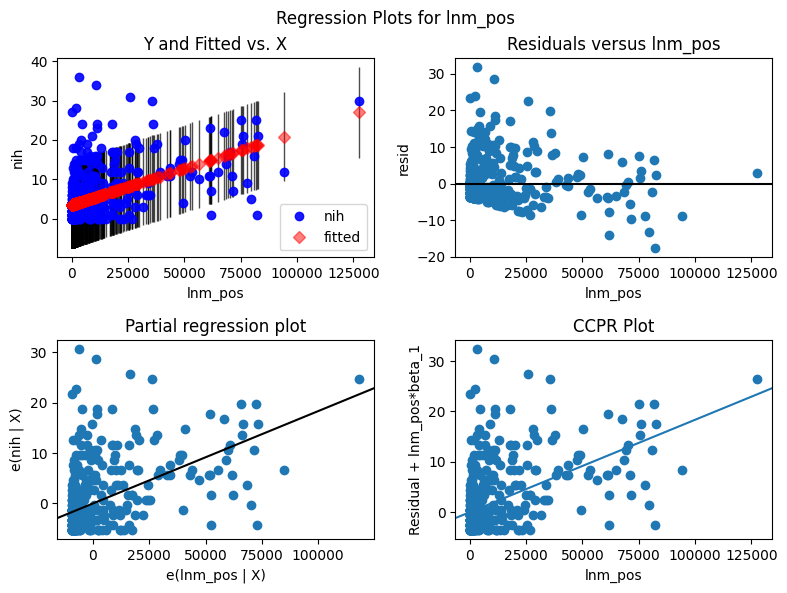

In [52]:
model = smf.ols(formula="nih~lnm_pos", data=df).fit()
sm.graphics.plot_regress_exog(model, "lnm_pos")
plt.show()

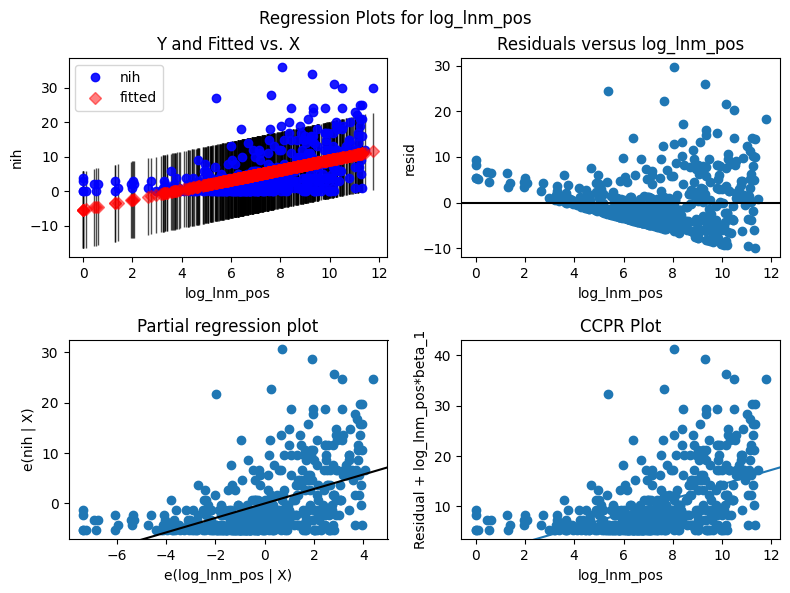

In [53]:
model = smf.ols(formula="nih~log_lnm_pos", data=df).fit()
sm.graphics.plot_regress_exog(model, "log_lnm_pos")
plt.show()

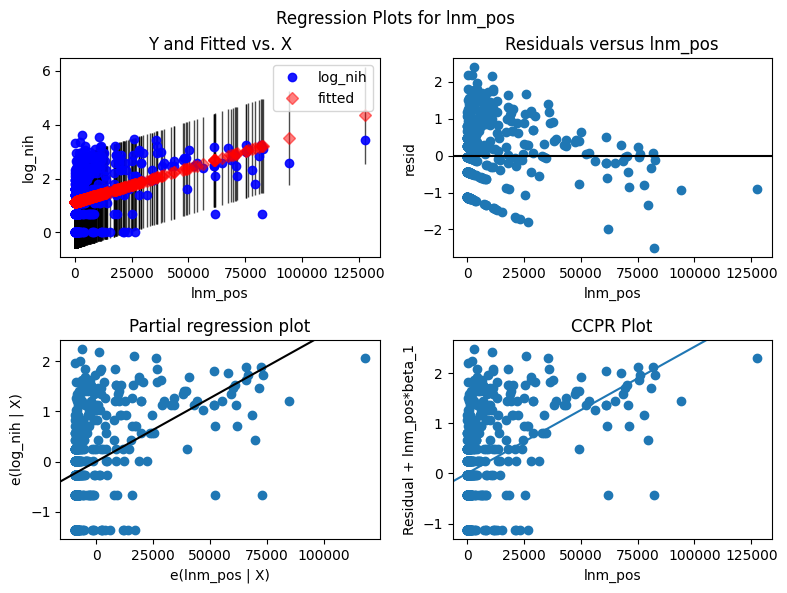

In [54]:
model = smf.ols(formula="log_nih~lnm_pos", data=df).fit()
sm.graphics.plot_regress_exog(model, "lnm_pos")
plt.show()

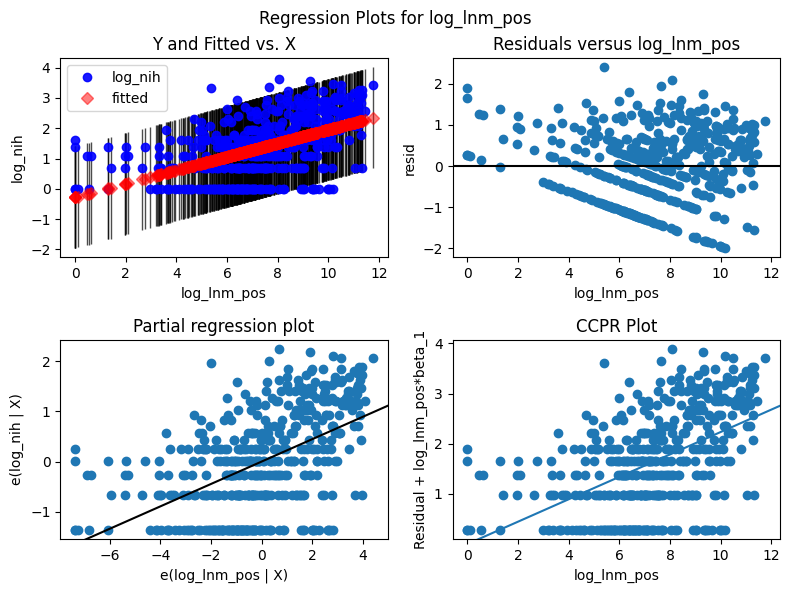

In [55]:
model = smf.ols(formula="log_nih~log_lnm_pos", data=df).fit()
sm.graphics.plot_regress_exog(model, "log_lnm_pos")
plt.show()

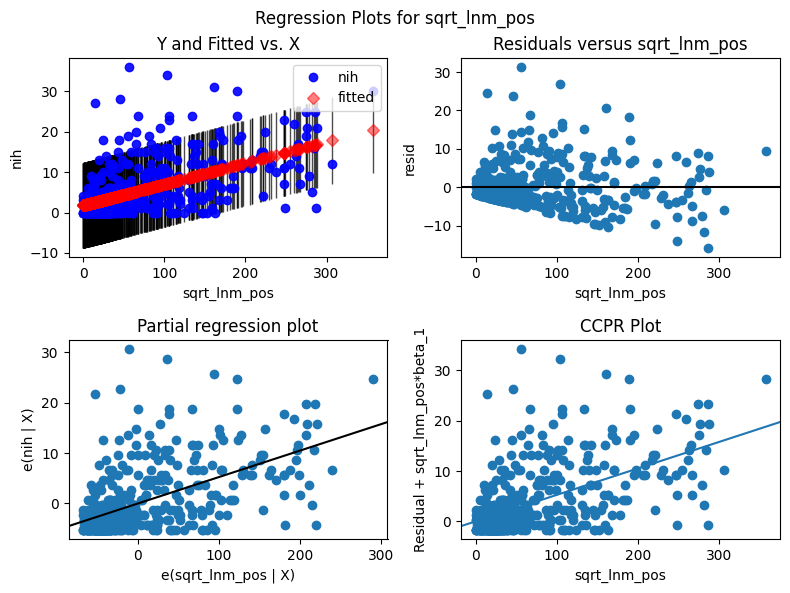

In [56]:
model = smf.ols(formula="nih~sqrt_lnm_pos", data=df).fit()
sm.graphics.plot_regress_exog(model, "sqrt_lnm_pos")
plt.show()

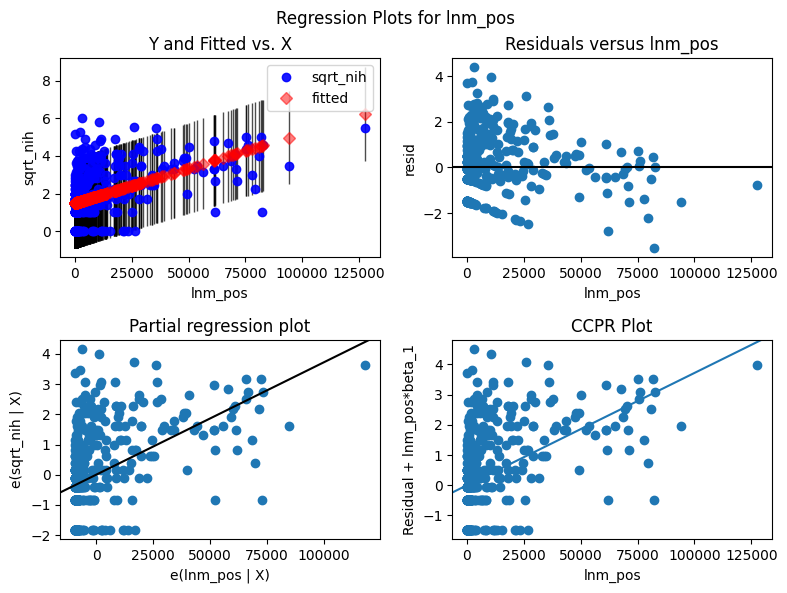

In [57]:
model = smf.ols(formula="sqrt_nih~lnm_pos", data=df).fit()
sm.graphics.plot_regress_exog(model, "lnm_pos")
plt.show()

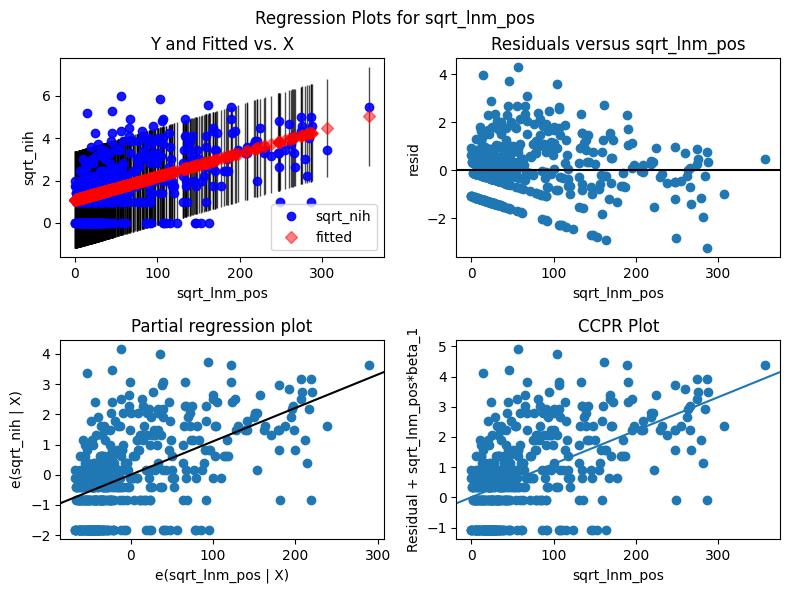

In [58]:
model = smf.ols(formula="sqrt_nih~sqrt_lnm_pos", data=df).fit()
sm.graphics.plot_regress_exog(model, "sqrt_lnm_pos")
plt.show()